In [1]:
%matplotlib inline
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.dates 
from matplotlib.dates import num2date

def datestr2num(s):
    """ Convert date string to number
    
    Same as matplotlib.dates.datestr2num but works with bytes string"""
    if isinstance(s, bytes):
        s = s.decode('ascii')
    return matplotlib.dates.datestr2num(s)

def load_data(file_name):
    return np.loadtxt(file_name, converters = {0: datestr2num}, unpack=True)

def figure_with_date(*args, **kwd):
    fig = figure(figsize=(10, 6))
    ax = fig.subplots(1, 1)
    formatter = matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S') 
    ax.xaxis.set_major_formatter(formatter)
    fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
    return fig, ax

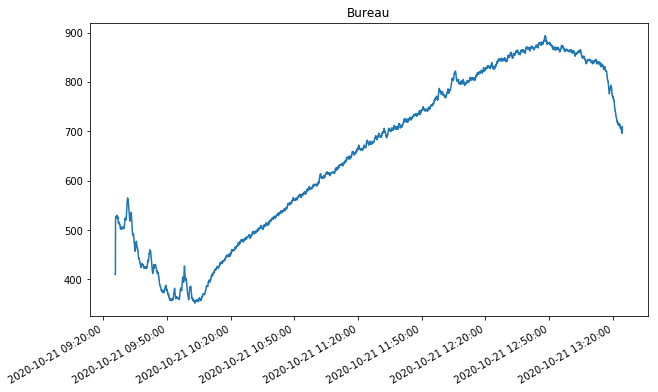

In [2]:
time, value = load_data('data/DAT_0020.txt')

fig, ax = figure_with_date(figsize=(10, 6))

ax.plot(num2date(time[1:]), value[1:])
ax.set_title('Bureau')

fig.savefig('data/fig_0020.pdf')
fig.savefig('data/fig_0020.svg')